# Example python plotting

In this notebook, we see how to directly plot subject surfaces OR use a "canonical" surface plot to plot data already loaded into a numpy array

In [1]:
import numpy as np
import nibabel as nib
import hippomaps as hm

/export03/data/opt/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Directly plot

When is this useful? When examining only 1 or few subjects, as in QC, looking at test cases, or a patient workup

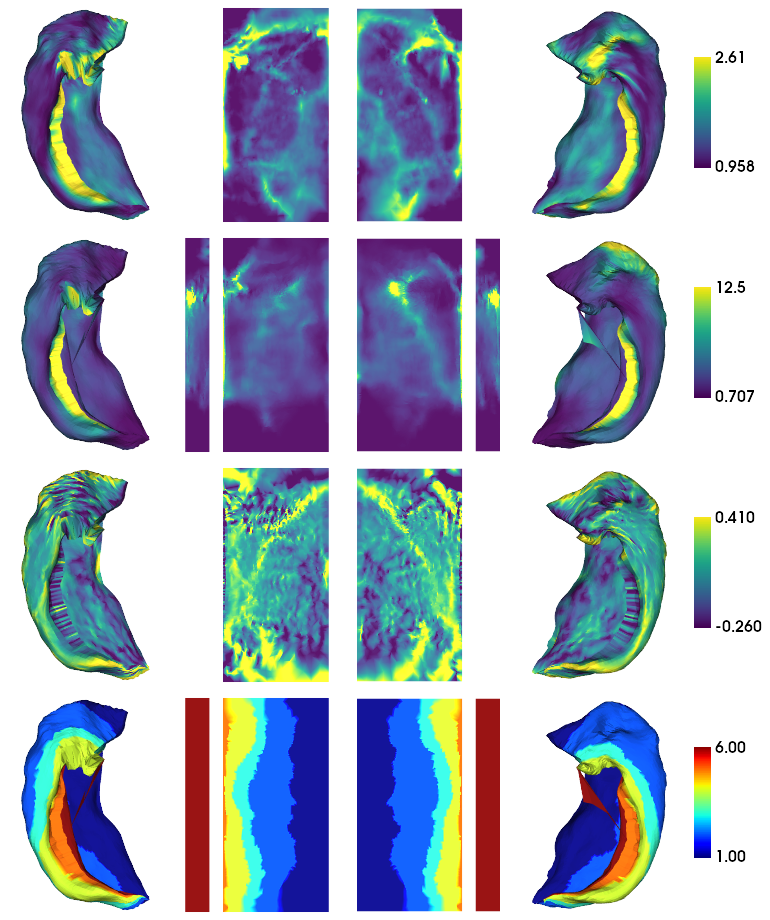

In [4]:
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold'
sub = 'HC002'
ses='01'
features = ['thickness', 'gyrification', 'curvature', 'subfields']
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
modality = 'T1w'

hm.plotting.surfplot_sub_foldunfold(hippunfold_dir, sub, ses, features, unfoldAPrescale=False, rotate=20, embed_nb=True, color_bar='right', share='row')

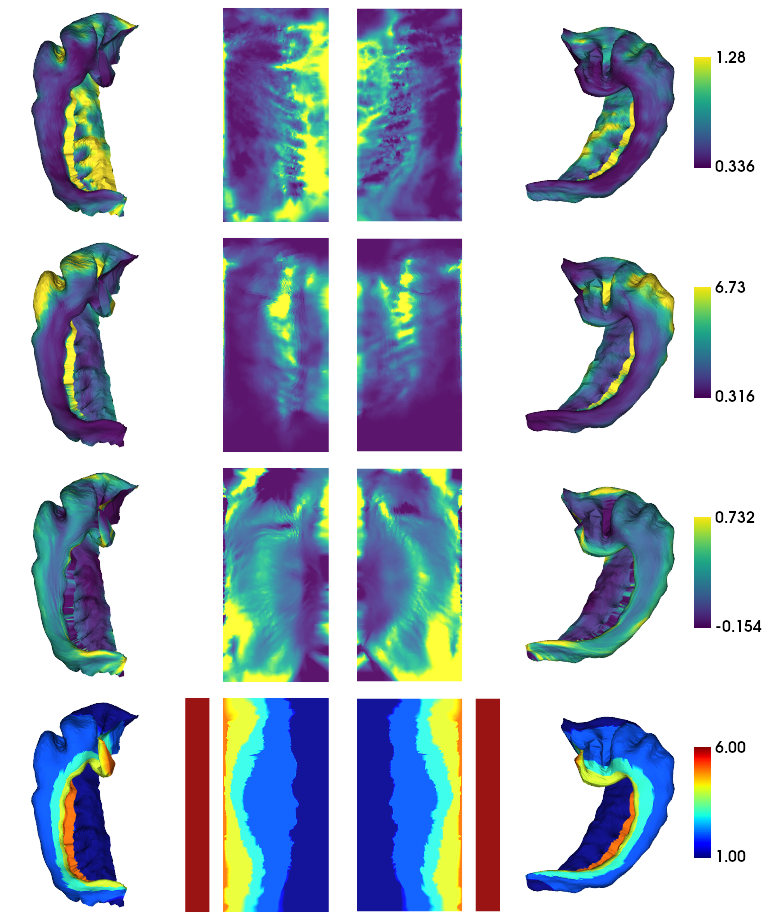

In [3]:
hippunfold_dir = '/export03/data/unfolded_registration/hippunfold_v1.3.0_100um/hippunfold'
sub = 'bbhist'
ses=''
features = ['thickness', 'gyrification', 'curvature', 'subfields']
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'
modality = 'T1w'

hm.plotting.surfplot_sub_foldunfold(hippunfold_dir, sub, ses, features, modality='corobl',unfoldAPrescale=False, embed_nb=True, color_bar='right', share='row')

## Plotting loaded data

When is this useful? Wen you're looking at data that isn't intrinsic to any one subject's hippocampal shape. For example, when averaging over several subjects or comparing groups

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


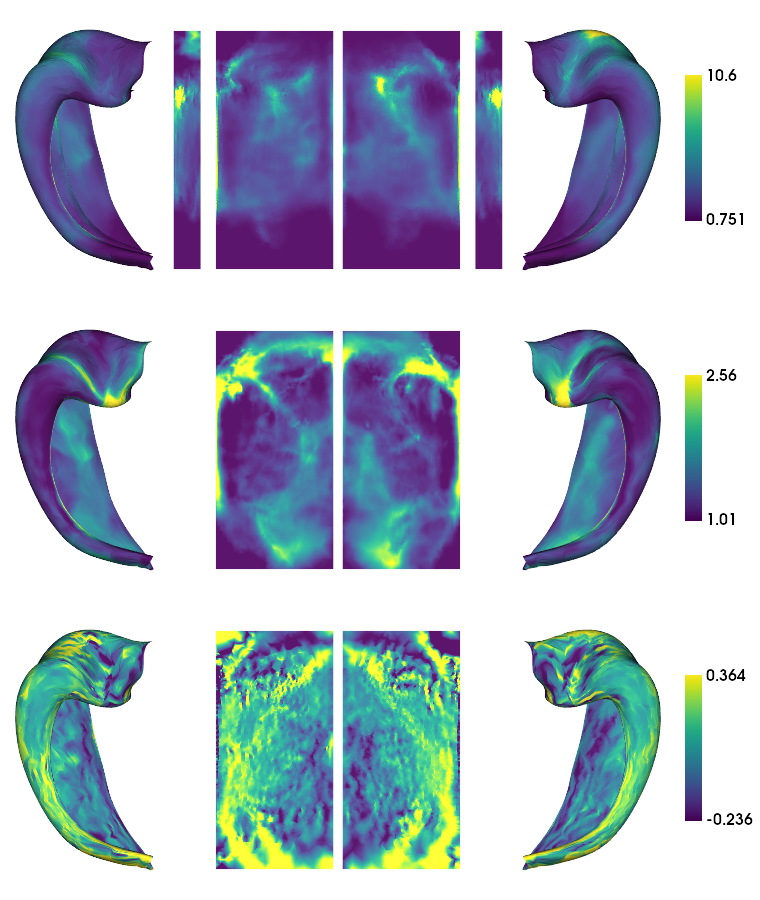

In [2]:
hippunfold_dir = '/data/mica3/BIDS_MICs/derivatives/hippunfold_v1.3.0/hippunfold'
subs = ['sub-HC002', 'sub-HC005']
ses='ses-01'
features = ['gyrification', 'thickness', 'curvature']
hemis = ['L','R']
labels=['hipp','dentate']
den = 'den-0p5mm'
size=[400,200]
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'

ind = [range(7262), range(7262,7262+1788)]
hipp_dat = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                fn = f'{hippunfold_dir}/{sub}/{ses}/surf/'\
                                 f'{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii'
                try:
                    d = nib.load(fn)
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    print(fn)
hipp_dat[:,0,:,2] = -hipp_dat[:,0,:,2] # flip left curvature

hm.plotting.surfplot_canonical_foldunfold(np.mean(hipp_dat[:,:,:,:],axis=2), tighten_cwindow=True, unfoldAPrescale=False, embed_nb=True, color_bar='right', share='row')

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


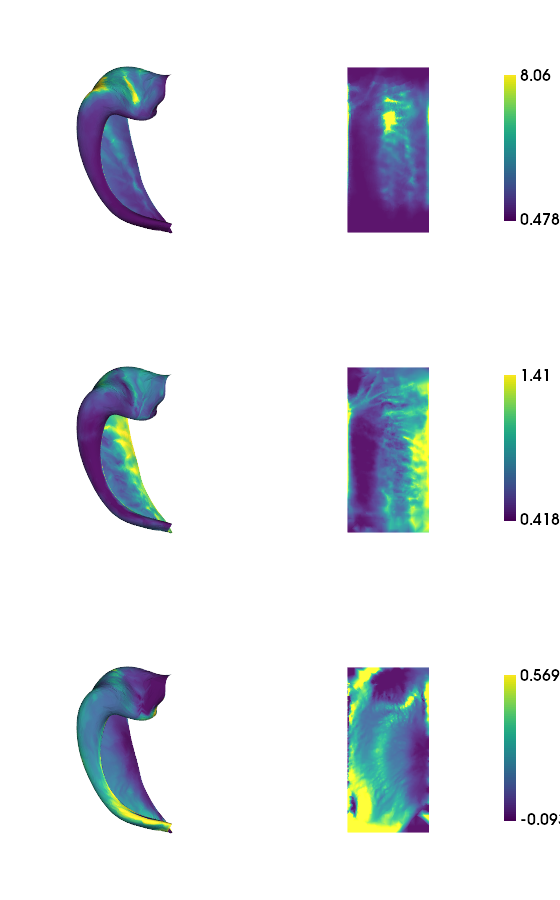

In [11]:
hippunfold_dir = '/export03/data/unfolded_registration/hippunfold_v1.3.0_100um/hippunfold'
subs = ['sub-bbhist', 'sub-122017']
ses=''
features = ['gyrification', 'thickness', 'curvature']
hemis = ['L','R']
labels=['hipp','dentate']
den = 'den-0p5mm'
size=[400,200]
resourcesdir = '/export03/data/opt/hippunfold_toolbox/resources'

ind = [range(7262), range(7262,7262+1788)]
hipp_dat = np.zeros([7262+1788,2,len(subs),len(features)])*np.nan
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        for h,hemi in enumerate(hemis):
            for l,label in enumerate(labels):
                fn = f'{hippunfold_dir}/{sub}/surf/'\
                                 f'{sub}_hemi-{hemi}_space-corobl'\
                                 f'_den-0p5mm_label-{label}_{feature}.shape.gii'
                try:
                    d = nib.load(fn)
                    hipp_dat[ind[l],h,s,f] = d.darrays[0].data
                except:
                    print(fn)
hipp_dat[:,0,:,2] = -hipp_dat[:,0,:,2] # flip left curvature

hm.plotting.surfplot_canonical_foldunfold(np.mean(hipp_dat,axis=(1,2)), hemis=['L'], tighten_cwindow=True, unfoldAPrescale=False, embed_nb=True, size=[500,300], zoom=0.8, color_bar='right', share='row')